# Particle size measurment with distribution

### IMAGE FORMAT CONVERSION FROM TIF TO JPG AND THEN CROPPING

In [1]:
from PIL import Image

image_path='DS-115_003'

# Load the TIFF image
tiff_image = Image.open(image_path+'.tif')  # Replace 'input.tif' with your TIFF image file path

# Save it as a JPEG image
tiff_image.save(image_path+'.jpg', 'JPEG')  # 'output.jpg' is the desired output file name



In [2]:
# Importing Image class from PIL module
from PIL import Image

# Opens a image in RGB mode
im = Image.open(image_path+'.jpg')

# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size

# Setting the points for cropped image
left = 0
top = 0
right = width
bottom = height-70

# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))


# Shows the image in image viewer
im1.save(image_path+'.jpg')

### THE ORIGINAL IMAGE

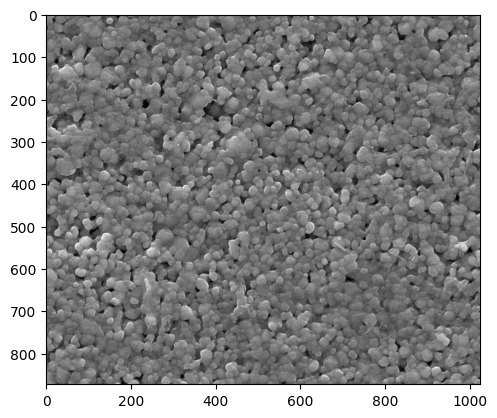

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread(image_path+'.jpg',1)
    
plt.imshow(image)

### THE IMAGE AFTER BRIGHTNESS ADJUSTED

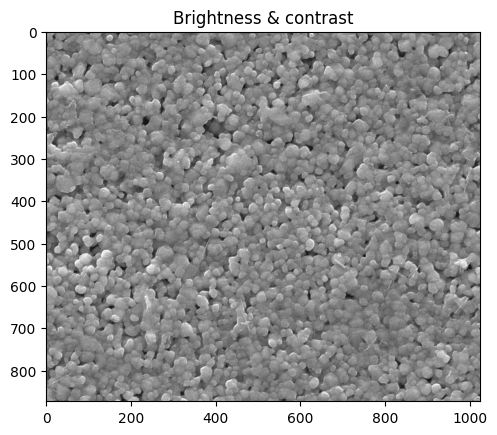

In [4]:
# Adjust the brightness and contrast
# Adjusts the brightness by adding 10 to each pixel value
brightness = 20
# Adjusts the contrast by scaling the pixel values by 2.3
contrast = 1

image2 = cv2.addWeighted(image, contrast, np.zeros(image.shape, image.dtype), 0, brightness)


plt.title("Brightness & contrast")
plt.imshow(image2)
plt.show()


### THE IMAGE AFTER SHARPENING

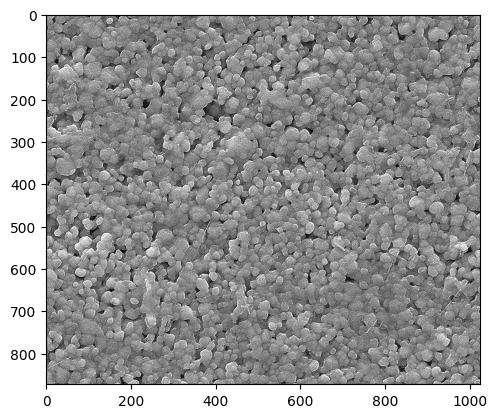

In [5]:
# Create the sharpening kernel
kernel = np.array([[0, -1, 0], [-1, 5, -1], [0, -1, 0]])
  
# Sharpen the image
image = cv2.filter2D(image2, -1, kernel)

plt.imshow(image)

### THE IMAGE AFTER BLURRING, THRESHOLDING TO SEPARATE PARTICLES, DRAW CONTOURS AROUND PARTICLES

Average Diameter of Particles: 22.864645661164303 (pixels)


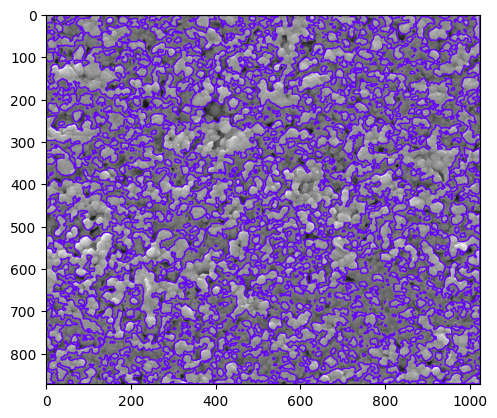

In [6]:
# Convert the cropped image to grayscale
gray_cropped = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Apply Gaussian blur to reduce noise
blurred = cv2.GaussianBlur(gray_cropped, (5, 5), 0)

# Apply thresholding to segment particles
threshold_value, thresholded = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Find contours of particles
contours, threshold_value = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calculate particle diameters and collect them in a list
particle_diameters = []
for contour in contours:
    (x, y), radius = cv2.minEnclosingCircle(contour)
    diameter = radius * 2
    particle_diameters.append(diameter)

# Draw particle boundaries
cv2.drawContours(image2, contours, -1, (100, 0, 255), 2)  # Green color, thickness 2

average_diameter = np.mean(particle_diameters)
print("Average Diameter of Particles:", average_diameter,"(pixels)")



# Display the cropped image with particle boundaries
plt.imshow(image2)

In [7]:
for i in range(len(particle_diameters)):
    particle_diameters[i]=round(particle_diameters[i],2)

In [8]:
particle_diameters.sort()
print(particle_diameters)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 1.41, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.0, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.24, 2.36

In [9]:
temp=particle_diameters

In [10]:
print(len(temp))

823


In [11]:
temp_copy = temp[:]
for i in range(len(temp_copy)):
    if temp_copy[i] == 0.0 or temp_copy[i] >= 90 or temp_copy[i]<20:
        temp.remove(temp_copy[i])


In [12]:
print(len(particle_diameters))

178


# MEAN SIZE OF THE PARTICLE after excluding outliers and cluserters

In [13]:
print(np.mean(particle_diameters))

39.56837078651685


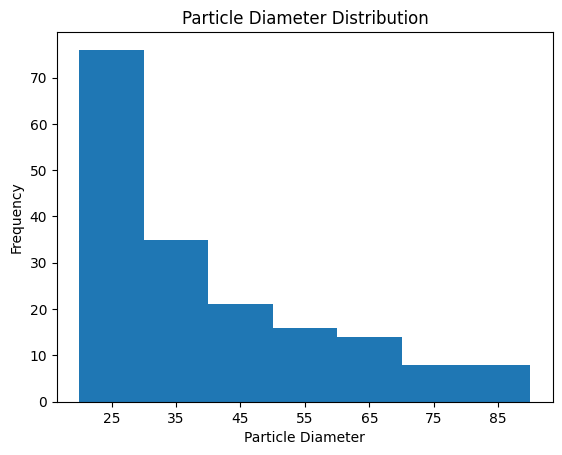

In [14]:
import matplotlib.pyplot as plt
import numpy as np


# Define the bins for particle diameter ranges
bins = [20, 30, 40, 50,60,70,80,90]  # Adjust these bins according to your data

# Create a histogram of the particle diameters
hist, bins = np.histogram(particle_diameters, bins=bins)

# Calculate the midpoints of each bin for labeling the x-axis
bin_midpoints = [(bins[i] + bins[i + 1]) / 2 for i in range(len(bins) - 1)]

# Create the bar chart
plt.bar(bin_midpoints, hist, width=10, align='center')

# Label the axes
plt.xlabel('Particle Diameter')
plt.ylabel('Frequency')

# Set the x-axis ticks to be the midpoints of the bins
plt.xticks(bin_midpoints)

# Add a title to the chart
plt.title('Particle Diameter Distribution')

# Show the chart
plt.show()


69.23
17.803728090976414
3


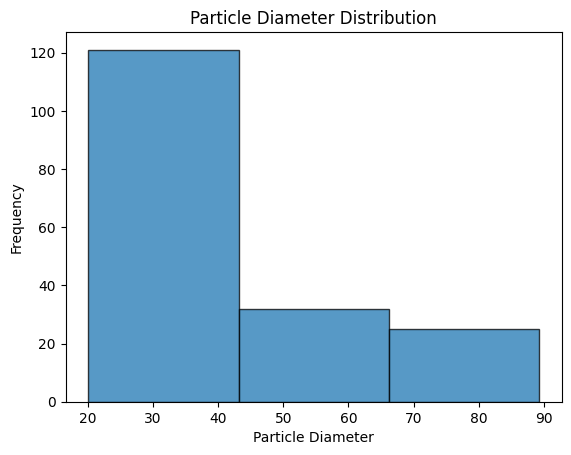

In [15]:
import matplotlib.pyplot as plt
import numpy as np



# Calculate the number of bins using the Freedman-Diaconis rule
data_range = max(particle_diameters) - min(particle_diameters)
print(data_range)
bin_width = 2 * np.percentile(particle_diameters, 75) / (len(particle_diameters) ** (1/3))
print(bin_width)
num_bins = int(data_range / bin_width)
print(num_bins)

# Create the histogram
plt.hist(particle_diameters, bins=num_bins, edgecolor='k', alpha=0.75)

# Label the axes
plt.xlabel('Particle Diameter')
plt.ylabel('Frequency')

# Add a title to the chart
plt.title('Particle Diameter Distribution')

# Show the chart
plt.show()
